In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



## Get Data


In [3]:
df = pd.read_csv("superstore_eda_cleaned.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery_Days,Order_Month,Order_Year,Delivery_Bucket
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,11,2017,Medium (3–5)
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,11,2017,Medium (3–5)
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,6,2017,Medium (3–5)
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,10,2016,Slow (6–10)
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,10,2016,Slow (6–10)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row ID           9800 non-null   int64  
 1   Order ID         9800 non-null   object 
 2   Order Date       9800 non-null   object 
 3   Ship Date        9800 non-null   object 
 4   Ship Mode        9800 non-null   object 
 5   Customer ID      9800 non-null   object 
 6   Customer Name    9800 non-null   object 
 7   Segment          9800 non-null   object 
 8   Country          9800 non-null   object 
 9   City             9800 non-null   object 
 10  State            9800 non-null   object 
 11  Postal Code      9789 non-null   float64
 12  Region           9800 non-null   object 
 13  Product ID       9800 non-null   object 
 14  Category         9800 non-null   object 
 15  Sub-Category     9800 non-null   object 
 16  Product Name     9800 non-null   object 
 17  Sales         

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Delivery_Days,Order_Month,Order_Year
count,9800.000000,9789.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,55273.322403,230.769059,3.961122,7.818469,2016.724184
std,2829.160653,32041.223413,626.651875,1.749614,3.281905,1.123984
min,1.000000,1040.000000,0.444000,0.000000,1.000000,2015.000000
25%,2450.750000,23223.000000,17.248000,3.000000,5.000000,2016.000000
50%,4900.500000,58103.000000,54.490000,4.000000,9.000000,2017.000000
75%,7350.250000,90008.000000,210.605000,5.000000,11.000000,2018.000000
max,9800.000000,99301.000000,22638.480000,7.000000,12.000000,2018.000000


## ML Objective

Objective:
Predict the Region of an order using sales value, delivery time, product category, customer segment, and city information.
This helps identify whether regions exhibit distinguishable purchasing and logistics behavior.

In [6]:
features = [
    'Sales',
    'Delivery_Days',
    'Category',
    'Sub-Category',
    'Segment',
    'City'
]

target = 'Region'

X = df[features]
y = df[target]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
num_features = ['Sales', 'Delivery_Days']
cat_features = ['Category', 'Sub-Category', 'Segment', 'City']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)


PCA

In [10]:
pca = PCA(n_components=0.95, random_state=42)

KNN Model Pipeline

In [11]:
knn_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('pca', pca),
    ('knn', KNeighborsClassifier(
        n_neighbors=7,
        weights='distance',
        metric='euclidean'
    ))
])


Training the Model

In [12]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Sales', 'Delivery_Days']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Category', 'Sub-Category',
                                                   'Segment', 'City'])])),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=7,
                                      weights='distance'))])

Model Evaluation

In [13]:
y_pred = knn_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Central       0.54      0.61      0.57       455
        East       0.73      0.64      0.68       557
       South       0.37      0.32      0.34       320
        West       0.65      0.71      0.68       628

    accuracy                           0.60      1960
   macro avg       0.57      0.57      0.57      1960
weighted avg       0.60      0.60      0.60      1960



Confusion matrex

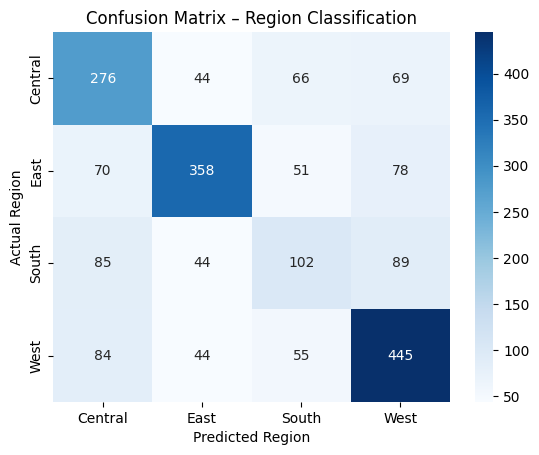

In [39]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=knn_pipeline.named_steps['knn'].classes_,
    yticklabels=knn_pipeline.named_steps['knn'].classes_
)
plt.xlabel("Predicted Region")
plt.ylabel("Actual Region")
plt.title("Confusion Matrix – Region Classification")
plt.savefig("Images/confusion_matrix_region_classification.png", dpi=300)
plt.show()


In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6025510204081632


PCA Explained Variance

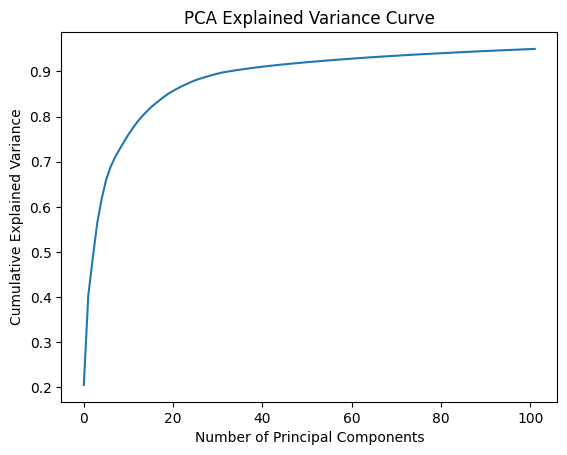

In [40]:
pca_model = knn_pipeline.named_steps['pca']
explained_variance = np.cumsum(pca_model.explained_variance_ratio_)

plt.figure()
plt.plot(explained_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Curve")
plt.savefig("Images/pca_explained_variance_curve.png", dpi=300)
plt.show()

K Value Tuning

In [18]:
k_values = range(3, 15)
accuracies = []

for k in k_values:
    model = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('pca', pca),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))


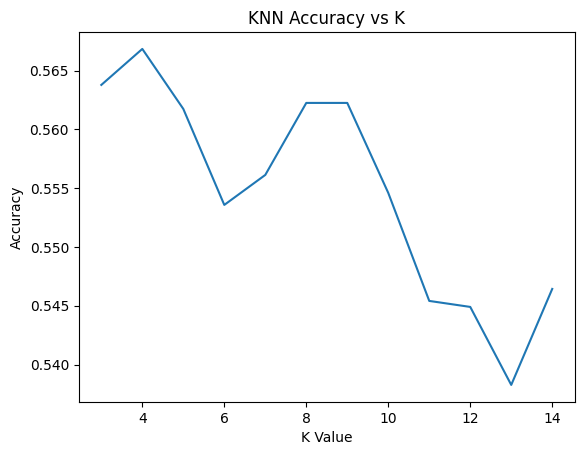

In [41]:
plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.savefig("Images/knn_accuracy_vs_k.png", dpi=300)
plt.show()

## City Clustering (Unsupervised Learning)

Objective

Cluster cities based on sales volume, order activity, and delivery efficiency to identify similar market segments for region-aware business and logistics strategies.

### Create City-Level Dataset

In [30]:
city_df = (
    df.groupby('City')
    .agg(
        Total_Sales=('Sales', 'sum'),
        Avg_Sales=('Sales', 'mean'),
        Total_Orders=('Order ID', 'nunique'),
        Avg_Delivery_Days=('Delivery_Days', 'mean')
    )
    .reset_index()
)

city_df.head()


,City,Total_Sales,Avg_Sales,Total_Orders,Avg_Delivery_Days
0,Aberdeen,25.500,25.500000,1,3.000000
1,Abilene,1.392,1.392000,1,2.000000
2,Akron,2724.244,136.212200,9,4.100000
3,Albuquerque,2220.160,158.582857,7,4.642857
4,Alexandria,5519.570,344.973125,6,4.750000


Select Features for Clustering

In [31]:
cluster_features = [
    'Total_Sales',
    'Avg_Sales',
    'Total_Orders',
    'Avg_Delivery_Days'
]

X_city = city_df[cluster_features]


Scale the Data

In [32]:
scaler = StandardScaler()
X_city_scaled = scaler.fit_transform(X_city)

Find Optimal Number of Clusters using Elbow Method

In [33]:
inertia = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_city_scaled)
    inertia.append(kmeans.inertia_)


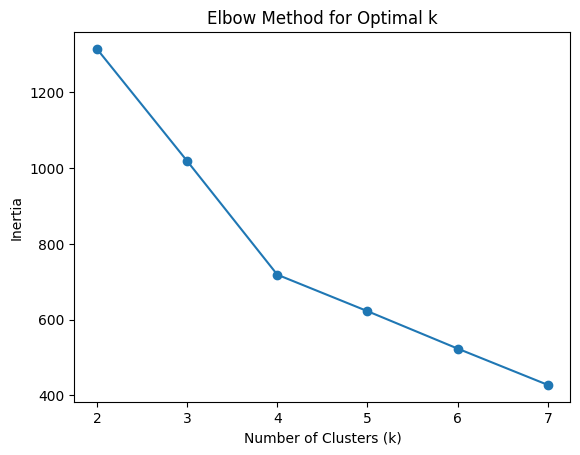

Optimal number of clusters appears to be 4 based on the elbow method.


In [42]:
plt.figure()
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.savefig("Images/elbow_method_kmeans.png", dpi=300)
plt.show()

print("Optimal number of clusters appears to be {} based on the elbow method.".format(k_range[np.argmin(np.diff(inertia)) + 1]))

Apply K-Means Clustering

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
city_df['Cluster'] = kmeans.fit_predict(X_city_scaled)

city_df.head()

,City,Total_Sales,Avg_Sales,Total_Orders,Avg_Delivery_Days,Cluster
0,Aberdeen,25.500,25.500000,1,3.000000,0
1,Abilene,1.392,1.392000,1,2.000000,0
2,Akron,2724.244,136.212200,9,4.100000,0
3,Albuquerque,2220.160,158.582857,7,4.642857,0
4,Alexandria,5519.570,344.973125,6,4.750000,0


Cluster Summary

In [36]:
cluster_summary = (
    city_df.groupby('Cluster')[cluster_features]
    .mean()
    .round(2)
)

cluster_summary

,Total_Sales,Avg_Sales,Total_Orders,Avg_Delivery_Days
Cluster,,,,
0,2569.13,157.26,6.27,3.92
1,137304.68,231.30,289.33,3.92
2,5044.20,771.86,3.87,4.28


PCA for 2D Visualization of Clusters

In [37]:
from sklearn.decomposition import PCA

pca_city = PCA(n_components=2, random_state=42)
X_city_pca = pca_city.fit_transform(X_city_scaled)

city_df['PC1'] = X_city_pca[:, 0]
city_df['PC2'] = X_city_pca[:, 1]

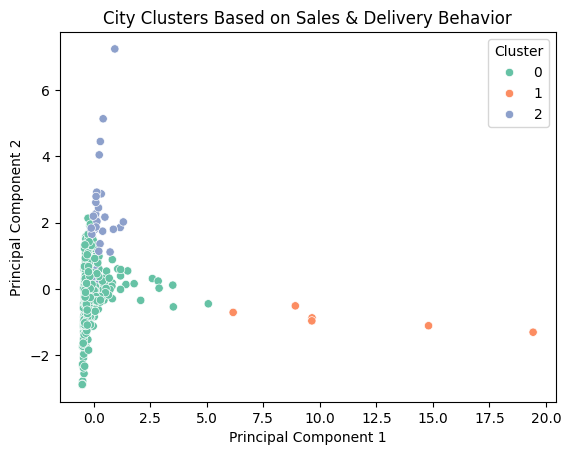

In [43]:
plt.figure()
sns.scatterplot(
    data=city_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set2'
)
plt.title("City Clusters Based on Sales & Delivery Behavior")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("Images/city_clusters_pca.png", dpi=300)
plt.show()

#### City clusters align with regional and delivery-time analysis, reinforcing that urban centers exhibit distinct purchasing and logistics behavior.